In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from glob import glob
import pickle
from operator import itemgetter
from scipy import signal
from scipy import misc

In [2]:
# list all saved files in directory
directory_template = 'data/box/'
list_of_pkl = glob(directory_template + '*.pkl')
len(list_of_pkl)

40

In [3]:
def calc_ac(x,n,r):
    left = np.roll(x,r,axis=1)
    right = np.roll(x,-r,axis=1)
    up = np.roll(x,r,axis=0)
    down = np.roll(x,-r,axis=0)
    left_up=np.roll(np.roll(x,r,axis=1),1,axis=0)
    left_down = np.roll(np.roll(x,r,axis=1),-r,axis=0)
    right_up = np.roll(np.roll(x,-r,axis=1),r,axis=0)
    right_down = np.roll(np.roll(x,-r,axis=1),-r,axis=0)
    
    e = (1/n) * (1/16) * sum(sum(x * (left + right + up + down + left_down + left_up + right_down + right_up)))
    return e

In [4]:
def map_r(x,y):
    return np.sqrt((x**2)+(y**2))

mapping = np.zeros((39,39))

for i in range(len(mapping)):
    for j in range(len(mapping)):
        mapping[i,j]=map_r(i,j)

mapping = mapping.reshape((-1))

In [5]:
number_of_particles = 150
list_of_ac_all_box = []
for each_box in list_of_pkl:
    # open each file and convert to numpy array
    with open(each_box,'rb') as f:
        box = np.array(pickle.load(f))
        ac = signal.correlate2d(box, box, boundary='symm', mode='full')/number_of_particles
        ac = ac.reshape((-1))
        list_of_ac_all_box.append(ac)


In [6]:
list_of_ac_all_box[0].shape

(1521,)

In [7]:
mapping[1500]

42.04759208325728

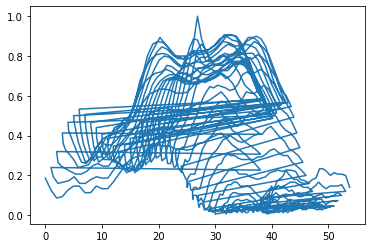

In [28]:
plt.plot(mapping,list_of_ac_all_box[5])

In [9]:
list_of_r0 = []
for each_box in list_of_ac_all_box:
    list_of_r0.append(-mapping/np.log(each_box))

list_of_r0 = np.array(list_of_r0).reshape((-1,39,39))
list_of_r0.shape

/home/kateb/Desktop/Computational-Biophysics-2019/monte carlo/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kateb/Desktop/Computational-Biophysics-2019/monte carlo/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


(40, 39, 39)